In [ ]:
import gym
import numpy as np
import random
import time

import tensorflow.compat.v1 as tf
import tflearn

from skimage.transform import resize
from skimage.color import rgb2gray

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

# constantes
show_game = True
episode_count = 20
max_sequence_length = 1000
action_repeat = 4
batch_size = 5
gamma = 0.99
learning_rate = 0.001

env = gym.make("MsPacman-v0")

# render 
def render():
    if show_game:
        plt.imshow(env.render(mode='rgb_array'))
        display.display(plt.gcf())
        display.clear_output(wait=True)
    
# valor de acao

def build_dqn(num_actions, action_repeat):
    inputs = tf.placeholder(tf.float32, [None, action_repeat, 84, 84])
    net = tf.transpose(inputs, [0, 2, 3, 1])
    
    net = tflearn.conv_2d(net, 16, 8, strides=4, activation='relu')
    net = tflearn.conv_2d(net, 32, 8, strides=2, activation='relu')
    net = tflearn.fully_connected(net, 256, activation='relu')
    
    q_values = tflearn.fully_connected(net, num_actions)
    
    return inputs, q_values

def build_evaluator(num_actions, q_values, learning_rate = 0.01):
    actions = tf.placeholder(tf.float32, shape = [None, num_actions])
    rewards = tf.placeholder(tf.float32, shape = [None])
    
    action_q_values = tf.reduce_sum(tf.multiply(q_values, actions), reduction_indices=1)
    cost = tflearn.mean_square(action_q_values, rewards)
    optimizer = tf.train.RMSPropOptimizer(learning_rate)
    tf_operation = optimizer.minimize(cost)
    
    return tf_operation, actions, rewards

def pre_process_screenshot(input):
    return resize(rgb2gray(input), (110, 84))[13:110 - 13, :]

def one_hot(n, size):
    array = np.zeros(size)
    array[n] = 1
    return array

def epsilon_greedy_action(q_values, timestep, final_epsilon, action_space):
    initial_epsilon = 1.0
    interp = timestep/max_sequence_length
    actual_epsilon = interp * final_epsilon + (1 - interp) * initial_epsilon

    if random.random() < actual_epsilon:
        action_index = random.randrange(action_space.n)
    else:
        action_index = np.argmax(q_values)
    
    return action_index

# Modelo de IA
inputs, q_values = build_dqn(env.action_space.n, action_repeat)
optimize_op, actions, rewards = build_evaluator(env.action_space.n, q_values)
        
# Memória
episodes = []

with tf.Session() as session:
    session.run(tf.initialize_all_variables())

    for ep in range(episode_count):
        episodes.append({"preprocessed_screenshots":[], "rewards":[], "actions": []})
        observation = env.reset()

        for i in range(action_repeat):
            episodes[-1]["preprocessed_screenshots"].append(pre_process_screenshot(observation))
        
            
        final_epsilon = np.random.choice(np.array([.1, .01, .5]), 1, p=[0.4, 0.3, 0.3])[0]
        
        for t in range(max_sequence_length):
            render()
            
            screenshots = episodes[-1]["preprocessed_screenshots"][t:t+action_repeat]
            screenshots = np.reshape(screenshots, (-1, 4, 84, 84))
            current_q_values = q_values.eval(session=session, feed_dict={inputs:screenshots})
            
            action = epsilon_greedy_action(current_q_values, t, final_epsilon, env.action_space)
            
            observation, reward, done, info = env.step(action)
            
            episodes[-1]["actions"].append(action)
            episodes[-1]["preprocessed_screenshots"].append(pre_process_screenshot(observation))
            
            if done:
                episodes[-1]["rewards"].append(reward)
                print("Episódio final após {} segundos".format(t+1))
                break
            else:
                screenshots = episodes[-1]["preprocessed_screenshots"][t+1:t+1+action_repeat]
                screenshots = np.reshape(screenshots, (-1, 4, 84, 84))
                next_q_values = q_values.eval(session=session, feed_dict={inputs:screenshots})
                
                reward += next_q_values.max() * gamma

                episodes[-1]["rewards"].append(reward)
            
            def fetch_experience():
                episode = episodes[random.randint(0, len(episodes) - 1)]
                experience_id = random.randint(0, len(episode["actions"]) - 1)
                
                screenshots = episode["preprocessed_screenshots"][experience_id + action_repeat]
                action = one_hot(episode["actions"][experience_id], env.action_space.n)
                reward = episode["rewards"][experience_id]
                
                return screenshots, action, reward
            
            batch_inputs = []
            batch_actions = []
            batch_rewards = []
            
            for i in range(batch_size):
                s, a, r = fetch_experience()
                batch_inputs.append(s)
                batch_actions.append(a)
                batch_rewards.append(r)
            
            session.run(optimize_op, feed_dict={inputs:batch_inputs, actions:batch_actions, rewards:batch_rewards})
                
    
print("done!")

9
['NOOP', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'UPRIGHT', 'UPLEFT', 'DOWNRIGHT', 'DOWNLEFT']


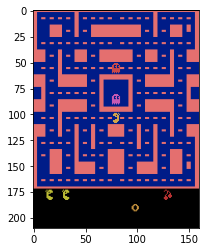

In [1]:
import gym
import tensorflow as tf
import matplotlib.pyplot as plt

env = gym.make("MsPacman-v0")
n_outputs = env.action_space.n
print(n_outputs)
print(env.env.get_action_meanings())
observation = env.reset()

for i in range(22):
  if i > 20:
    plt.imshow(observation)
    plt.show()
observation, _, _, _ = env.step(1)


In [17]:
import numpy as np
import gym
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from tf.contrib.layers import flatten, conv2d, fully_connected
from collections import deque, Counter
import random
from datetime import datetime

print(tf.__version__)

Instructions for updating:
non-resource variables are not supported in the long term


ModuleNotFoundError: No module named 'tf'

In [13]:
#Visualization cobe for running within Colab

# Install dependencies first for graphics visualization within Colaboratory

#remove " > /dev/null 2>&1" to see what is going on under the hood
# !pip install gym pyvirtualdisplay > /dev/null 2>&1
# !apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

# !apt-get update > /dev/null 2>&1
# !apt-get install cmake > /dev/null 2>&1
# !pip install --upgrade setuptools 2>&1
# !pip install ez_setup > /dev/null 2>&1

!pip install gym pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg

!apt-get update
!apt-get install cmake
!pip install --upgrade setuptools
!pip install ez_setup

^C
distutils: /usr/local/lib/python3.6/dist-packages
sysconfig: /usr/lib/python3.6/site-packages
distutils: /usr/local/lib/python3.6/dist-packages
sysconfig: /usr/lib/python3.6/site-packages
distutils: /usr/local/include/python3.6/UNKNOWN
sysconfig: /usr/include/python3.6m
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 784 kB 5.6 MB/s eta 0:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 51.3.3
    Uninstalling setuptools-51.3.3:
      Successfully uninstalled setuptools-51.3.3
  distutils: /usr/local/lib/python3.6/dist-packages
  sysconfig: /usr/lib/python3.6/site-packages
  distutils: /usr/local/lib/python3.6/dist-packages
  sysconfig: /usr/lib/python3.6/site-packages
  distutils: /usr/local/include/python3.6/setuptools
  sysconfig: /usr/include/python3.6m/setuptools
  distutils: /usr/local/bin
  sysconfig: /usr/bin
  dis

In [16]:
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only

import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay


from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

#Evaluate model on openAi GYM
env = wrap_env(gym.make('MsPacman-v0'))
observation = env.reset()
new_observation = observation

prev_input = None
done = False

with tf.compat.v1.Session() as sess:
    init.run()
    while True:
      if True: 
    
        #set input to network to be difference image
    

        obs = preprocess_observation(observation)

        # feed the game screen and get the Q values for each action
        actions = mainQ_outputs.eval(feed_dict={X:[obs], in_training_mode:False})

        # get the action
        action = np.argmax(actions, axis=-1)
        actions_counter[str(action)] += 1 

        # select the action using epsilon greedy policy
        action = epsilon_greedy(action, global_step)
        env.render()
        observation = new_observation        
        # now perform the action and move to the next state, next_obs, receive reward
        new_observation, reward, done, _ = env.step(action)

        if done: 
          #observation = env.reset()
          break
      
    env.close()
    show_video()

NameError: name 'init' is not defined

paper 
https://github.com/tflearn/tflearn/blob/master/examples/reinforcement_learning/atari_1step_qlearning.py
https://arxiv.org/pdf/1602.01783v1.pdf

blog
https://towardsdatascience.com/advanced-dqns-playing-pac-man-with-deep-reinforcement-learning-3ffbd99e0814
https://github.com/EXJUSTICE/Deep_Q-learning_OpenAI_MissPacman/blob/master/TF2_MsPacMan_GC.ipynb
https://towardsdatascience.com/automating-pac-man-with-deep-q-learning-an-implementation-in-tensorflow-ca08e9891d9c
https://github.com/MorvanZhou/Reinforcement-learning-with-tensorflow

youtube
p1 https://www.youtube.com/watch?v=wnt82QT6kII
p2 https://www.youtube.com/watch?v=YmEiDEJIcHU
